In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

df=pd.read_csv("measurements.csv")

df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [2]:
df.shape

(388, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [4]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

C:\Users\Smart Bridge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


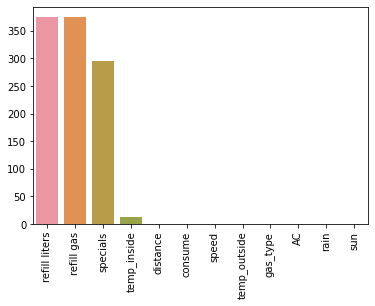

In [7]:
null_values=df.isnull().sum().sort_values(ascending=False)
ax=sns.barplot(null_values.index,null_values.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
import matplotlib.pyplot as plt
plt.show()

<AxesSubplot:>

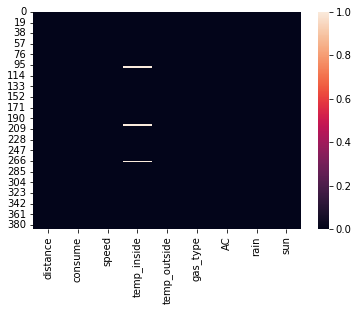

In [8]:
df.drop(['refill gas','refill liters','specials'],axis=1,inplace=True)
sns.heatmap(df.isnull())

In [47]:
df['temp_inside'] = df['temp_inside'].astype(str).str.replace(',','.')
df['distance'] = df['distance'].astype(str).str.replace(',','.')
df['consume'] = df['consume'].astype(str).str.replace(',','.')


In [48]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,21.5,12,E10,0,0,0
1,12,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [49]:
df['temp_inside'].value_counts()

21.5                  133
22.0                  102
22.5                   59
20.0                   25
21.0                   13
23.0                   13
21.929521276595743     12
25.0                   12
24.5                    7
20.5                    4
24.0                    3
23.5                    2
25.5                    2
19.0                    1
Name: temp_inside, dtype: int64

In [50]:
df.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   388 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   AC            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.4+ KB


In [52]:
df['temp_inside'] = df['temp_inside'].astype('float')

In [53]:
temp_inside_mean=np.mean(df['temp_inside'])

In [54]:
print(temp_inside_mean)

21.92952127659574


In [55]:
df['temp_inside'].fillna(temp_inside_mean,inplace=True)

In [56]:
df.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [57]:
x=df.drop(['consume','gas_type'],axis=1)

In [58]:
y=df['consume']

In [62]:
y = y.astype('float')


In [63]:
x.head()

,distance,speed,temp_inside,temp_outside,AC,rain,sun
0,28,26,21.5,12,0,0,0
1,12,30,21.5,13,0,0,0
2,11.2,38,21.5,15,0,0,0
3,12.9,36,21.5,14,0,0,0
4,18.5,46,21.5,15,0,0,0


In [64]:
from sklearn.preprocessing import scale
X_scaled=pd.DataFrame (scale(x), columns=x.columns)
X_scaled.head()

,distance,speed,temp_inside,temp_outside,AC,rain,sun
0,0.368714,-1.172804,-0.432382,0.091908,-0.28948,-0.375735,-0.299813
1,-0.338044,-0.878274,-0.432382,0.235123,-0.28948,-0.375735,-0.299813
2,-0.373381,-0.289216,-0.432382,0.521552,-0.28948,-0.375735,-0.299813
3,-0.298288,-0.436480,-0.432382,0.378338,-0.28948,-0.375735,-0.299813
4,-0.050923,0.299843,-0.432382,0.521552,-0.28948,-0.375735,-0.299813


In [65]:
y.dtype

dtype('float64')

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=1)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [68]:
l.fit(X_train,y_train)

LinearRegression()

In [69]:
X_train.shape

(310, 7)

In [70]:
y_pred=l.predict(X_test)

In [71]:
print(l.coef_,l.intercept_)

[ 0.06098318 -0.25848807 -0.08457254 -0.29910799  0.14843329  0.16317931
 -0.03078575] 4.938915956072435


In [72]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.5465365506923653
0.5951773803147185
0.7392811039735597


In [79]:
import joblib
joblib.dump(l,'model.save')

['model.save']